In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\Classified Data', index_col = 0)
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


## 백포도주와 적포도주를 분류하는 모델을 학습시켜서 생성
- input_data: 화학적인 성분의 값
- target_data: 적포도주, 백포도주

In [10]:
#1. 전처리 할거 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [11]:
#2. X, y 설정
X = df.drop('TARGET CLASS', axis = 1)
y = df['TARGET CLASS']

In [12]:
#3. train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2024)

In [23]:
#4. 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
# n_neighbors : 몇개 뽑을건지, 하이퍼파라미터로 사람이 결정하는 값임
# 이 값에 따라 과적합 발생할수도, 좋은 결과 나올 수도 있다.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
#5. 예측
pred = knn.predict(X_test)

In [25]:
#6. 모델 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       156
           1       0.92      0.96      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [33]:
# 최적화 하기 위해 hyper parameter optimization
from sklearn.metrics import accuracy_score

accuracy_scores = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred.flatten()))

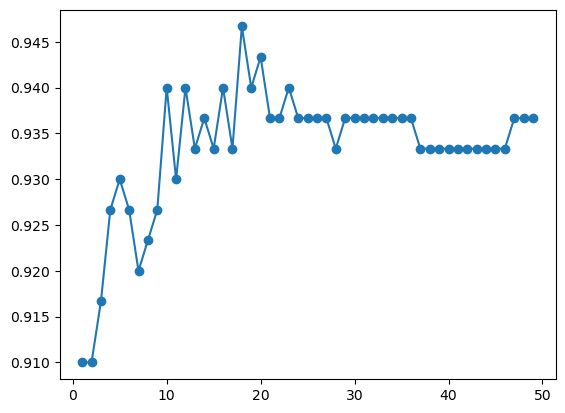

In [35]:
plt.plot(range(1, 50), accuracy_scores, marker = 'o')

In [37]:
print(np.array(accuracy_scores).argmax())
print(np.array(accuracy_scores).max())

# k가 17일 때 가장 성능이 좋다 (accuracy : 96)

17
0.9466666666666667
